# Importing required Library

In [30]:
# Helper libraries
import time
import pandas as pd
import numpy as np

# Visualization libraries
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Evaluation libraries
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score


# Exploratory Data Analaysis

In [31]:
# Load the dataset
income_attributes_data = pd.read_csv("resources/dataset/income_evaluation.csv")
print("Data size:", income_attributes_data.shape)
display(income_attributes_data.head())

Data size: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
# Data Description
display(income_attributes_data.describe())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
# Data Summary
print(income_attributes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [34]:
# Data Cleaning
income_attributes_data.isin([' ?']).sum(axis=0)

age                   0
 workclass         1836
 fnlwgt               0
 education            0
 education-num        0
 marital-status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 capital-gain         0
 capital-loss         0
 hours-per-week       0
 native-country     583
 income               0
dtype: int64

**Observation**: In most instances where the work class is absent, the occupation field is also empty.



In [35]:
# Drop the missing value rows
income_attributes_data.replace(" ?", pd.NA, inplace=True)
income_attributes_data.dropna(inplace=True)

In [36]:
income_attributes_data.shape

(30162, 15)

In [37]:
income_attributes_data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [38]:
# Strip whitespace from column names
income_attributes_data.columns = [column.strip() for column in income_attributes_data.columns]
income_attributes_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [39]:
# Strip and lower all values in the dataset
income_attributes_data = income_attributes_data.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

**Observation:** Column "education" and "education-num" represents the same information.

In [40]:
# Drop column education
income_attributes_data.drop(columns=['education'], inplace=True)

**Feature Engineering:** Simplify 'workclass' by categorizing it into government, self-employed, private, and without pay

In [41]:
# Transform work class column

def update_workclass(value):
    if '-' in value:
        if value.split('-')[1].startswith('gov'):
            return 'gov'
        elif value.startswith('self'):
          return 'self'
    return value

income_attributes_data['workclass'] = income_attributes_data['workclass'].apply(update_workclass)

**Feature Engineering:** Age was categorized into groups based on the minimum and maximum ages observed.

In [42]:
# Check minimum and maximum age

min_age = income_attributes_data["age"].min()
max_age = income_attributes_data["age"].max()
print("Min age:", min_age, "\nMax age:", max_age)

Min age: 17 
Max age: 90


In [43]:
# Convert age column into groups

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
labels_class = [i for i in range(len(labels))]

income_attributes_data['age_group'] = pd.cut(income_attributes_data['age'], bins=bins, labels=labels_class, right=False)
income_attributes_data.drop(columns=['age'], inplace=True)

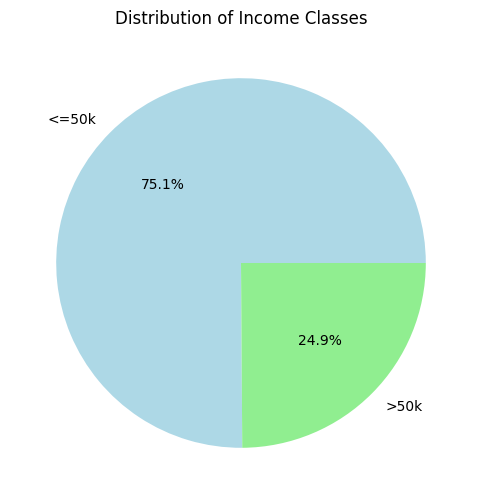

In [44]:
# Income class distribution

income_counts = income_attributes_data['income'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Income Classes')
plt.show()


Observation: The dataset is imbalanced

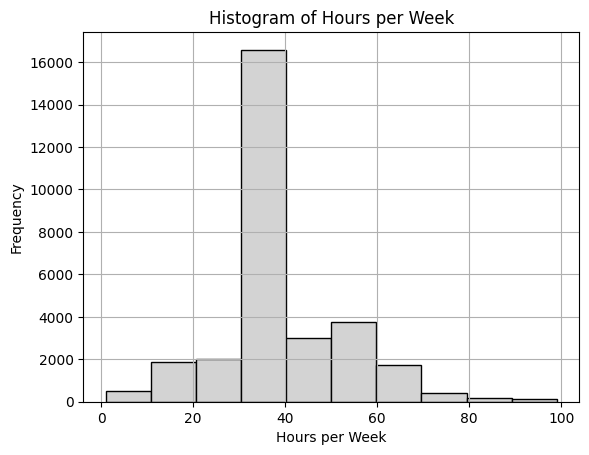

In [45]:
# Histogram of hours-per-week

plt.hist(income_attributes_data['hours-per-week'], bins=10, color='lightgray', edgecolor='black')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Histogram of Hours per Week')
plt.grid(True)
plt.show()

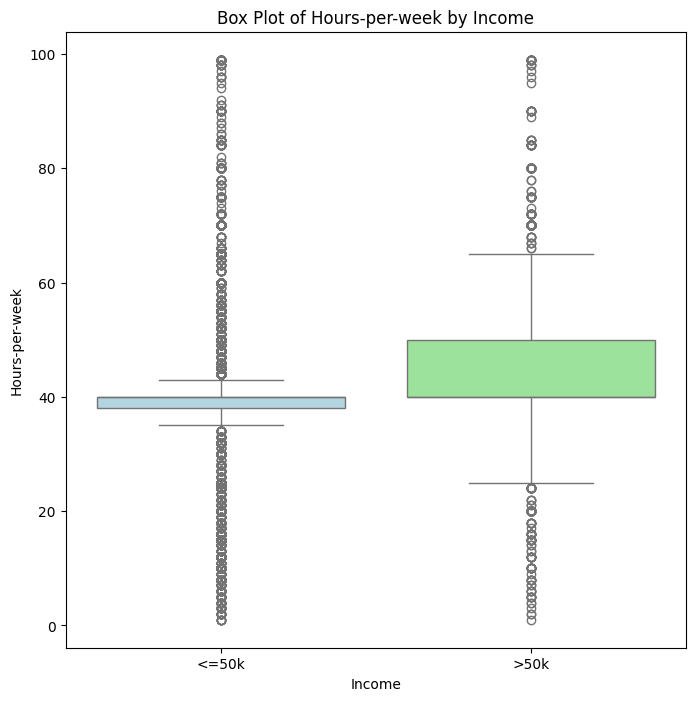

In [46]:
# Box plot of hours per week

plt.figure(figsize=(8, 8))
sns.boxplot(
    data=income_attributes_data, y='hours-per-week', x='income',
    hue='income', palette={'<=50k': 'lightblue', '>50k': 'lightgreen'}
    )
plt.title('Box Plot of Hours-per-week by Income')
plt.xlabel('Income')
plt.ylabel('Hours-per-week')
plt.show()


**Observation:** The "hours-per-week" column contains values that are outliers.

**Feature Engineering:** Simplify 'hours-per-week' by categorizing it into minimal, stanard, extended

In [47]:
# Categorize work hours

def categorize_hours(hours):
    if hours < 30:
        return 'minimal'
    elif 30 <= hours <= 60:
        return 'standard'
    else:
        return 'extended'

income_attributes_data['work_hours_category'] = income_attributes_data['hours-per-week'].apply(categorize_hours)
income_attributes_data.drop(columns=['hours-per-week'], inplace=True)


In [48]:
# Encode string values to number

label_encoder = LabelEncoder()
income_attributes_data = income_attributes_data.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)
display(income_attributes_data.head(10))

,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,age_group,work_hours_category
0,0,77516,13,4,0,1,4,1,2174,0,38,0,2,2
1,2,83311,13,2,3,0,4,1,0,0,38,0,4,1
2,1,215646,9,0,5,1,4,1,0,0,38,0,2,2
3,1,234721,7,2,5,0,2,1,0,0,38,0,4,2
4,1,338409,13,2,9,5,2,0,0,0,4,0,1,2
5,1,284582,14,2,3,5,4,0,0,0,38,0,2,2
6,1,160187,5,3,7,1,2,0,0,0,22,0,3,1
7,2,209642,9,2,3,0,4,1,0,0,38,1,4,2
8,1,45781,14,4,9,1,4,0,14084,0,38,1,2,2
9,1,159449,13,2,3,0,4,1,5178,0,38,1,3,2


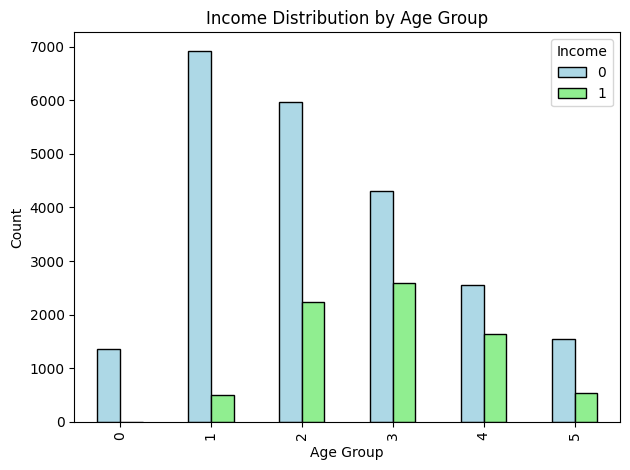

In [49]:
# Plot side-by-side age group bar graph

income_by_age_group = income_attributes_data.groupby(["age_group", "income"]).size().unstack()
income_by_age_group.plot(kind='bar', color=["lightblue", "lightgreen"], edgecolor='black')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title="Income")
plt.tight_layout()
plt.show()

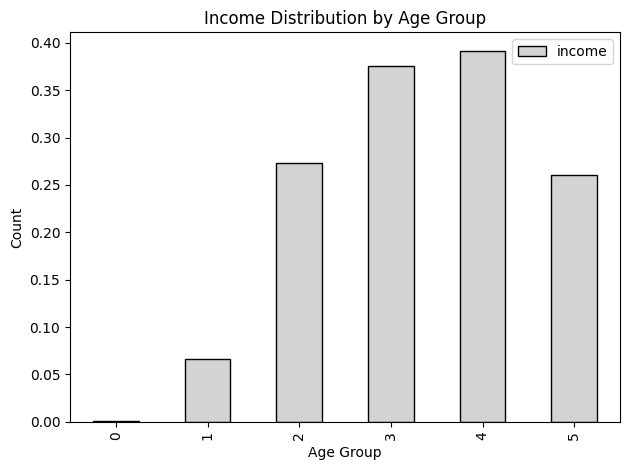

In [50]:
# Visualize count of adult that falls below 50K and above 50K income according to their age group

income_by_age_group = income_attributes_data.groupby(["age_group"])["income"].mean()
income_by_age_group.plot(kind='bar', color="lightgray", edgecolor='black')
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

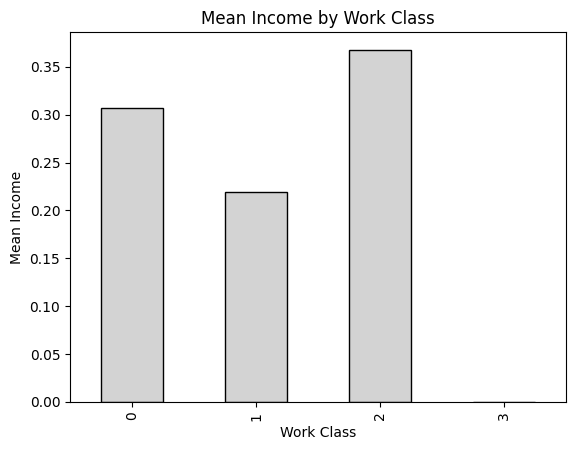

In [51]:
# Plot mean income according to workclass

income_by_workclass = income_attributes_data.groupby('workclass').income.mean()
income_by_workclass.plot(kind='bar', color="lightgray", edgecolor='black')
plt.title('Mean Income by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Mean Income')
plt.show()

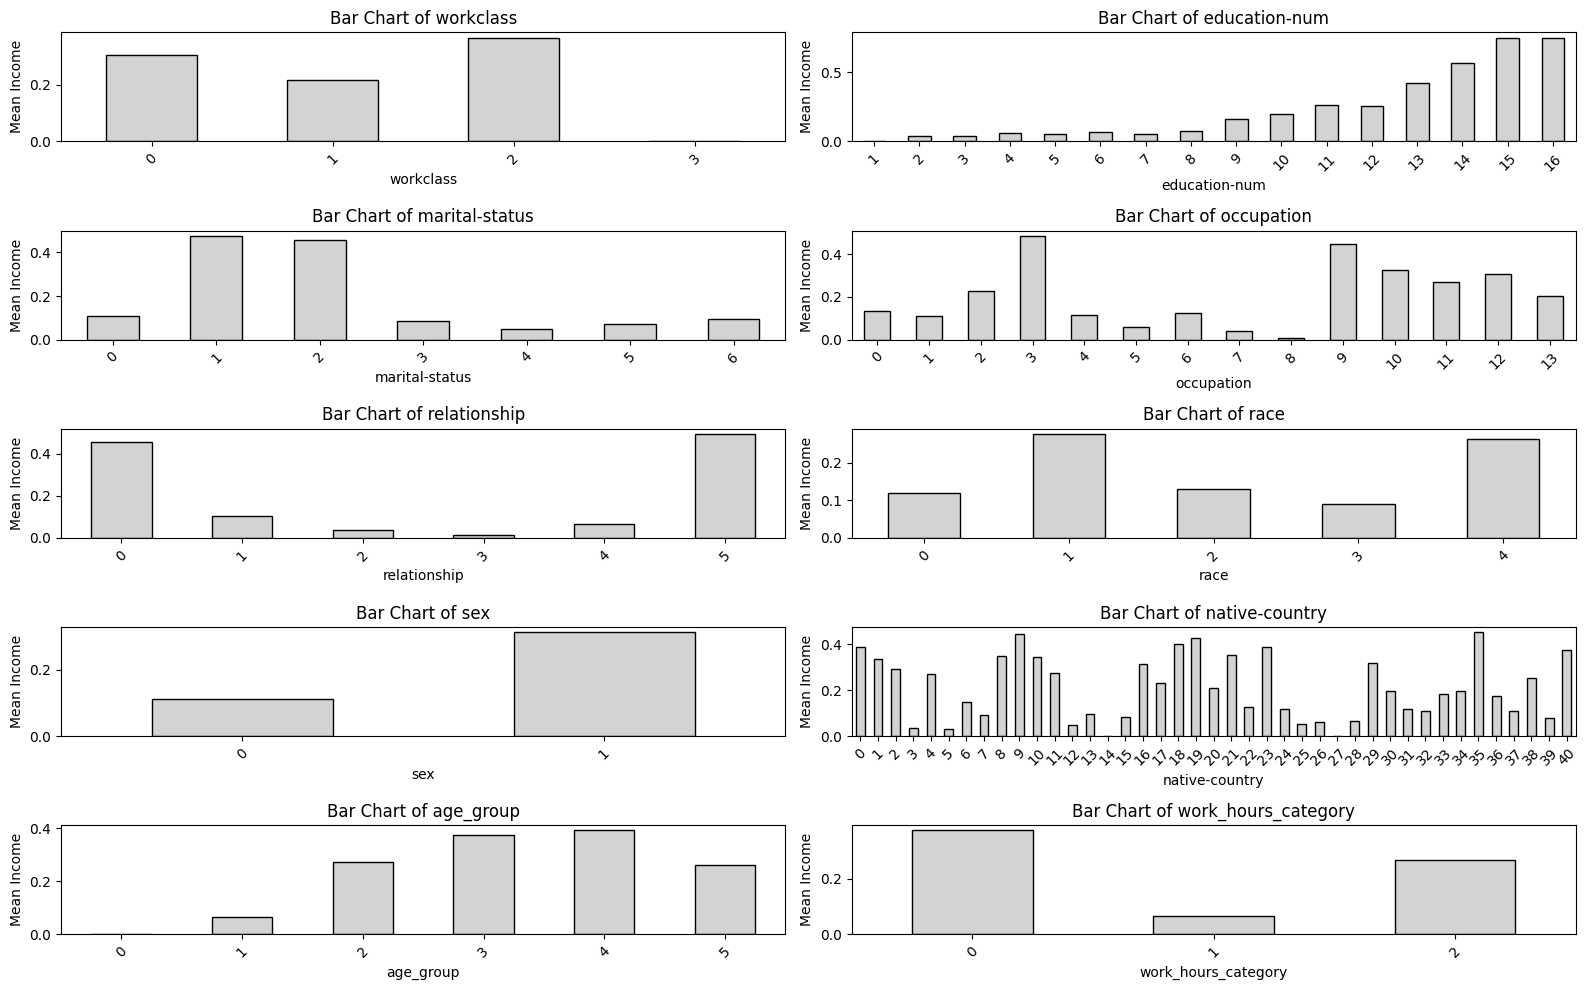

In [52]:
# Plot Income attributes bar graph

def plot_bar_chart(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns - 1) // 2 + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=min(2, num_columns), figsize=(16, 10))

    for i, column in enumerate(columns):
        row_idx = i // 2
        col_idx = i % 2

        income_by_attribute = income_attributes_data.groupby(column).income.mean()
        income_by_attribute.plot(kind='bar', color='lightgray', edgecolor='black', ax=axes[row_idx][col_idx])
        axes[row_idx][col_idx].set_title(f'Bar Chart of {column}')
        axes[row_idx][col_idx].set_xlabel(column)
        axes[row_idx][col_idx].set_ylabel('Mean Income')
        axes[row_idx][col_idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


columns_to_plot = [
    'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country',
    'age_group', 'work_hours_category'
    ]
plot_bar_chart(income_attributes_data, columns_to_plot)


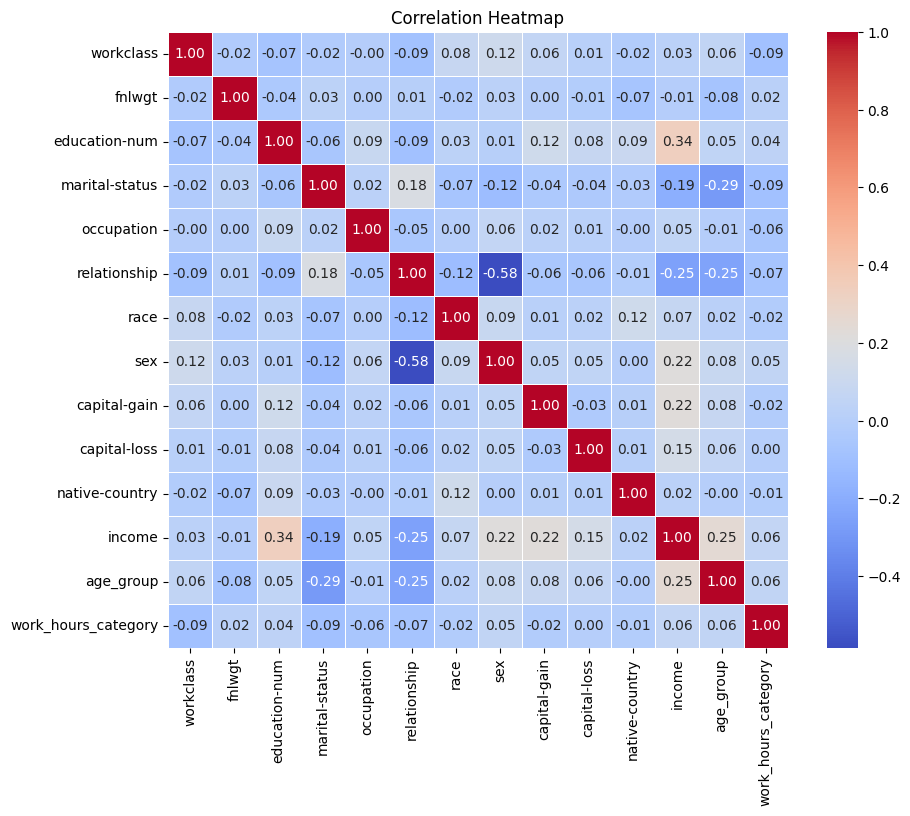

In [53]:
# Correlation matrix

correlation_matrix = income_attributes_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [54]:
# Drop columns with low co-relation
income_attributes_data.drop(columns=["workclass", "fnlwgt", "occupation", "race", "native-country", "work_hours_category"], inplace=True)

# Model Training

In [55]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    income_attributes_data.drop(columns=['income']), income_attributes_data['income'], test_size=0.3, random_state=42, shuffle=True
)

In [64]:
# Initialize classifiers
svm = SVC()
knn = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

In [65]:
# Train function using cross-validation

def train_with_cv(model, X, y):

    start_time = time.time()

    rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, cv=rkf, scoring='accuracy')
    mean_score = scores.mean()

    print(f"Mean accuracy with cross-validation: {round(mean_score, 4)*100} %")
    print(f"Model training time: {round((time.time()-start_time), 2)} ms")

    return mean_score

In [66]:
# Train the models

models = {
    'Support Vector Machine': svm,
    'KNN': knn,
    'Logistic Regression': logistic_regression,
    'Random Forest': random_forest,
    'Gradient Boosting': gradient_boosting
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    train_with_cv(model, X_train, y_train)
    model.fit(X_train, y_train)



Training Support Vector Machine...
Mean accuracy with cross-validation: 79.65 %
Model training time: 286.9 ms

Training KNN...
Mean accuracy with cross-validation: 83.13000000000001 %
Model training time: 8.96 ms

Training Logistic Regression...
Mean accuracy with cross-validation: 82.06 %
Model training time: 18.23 ms

Training Random Forest...
Mean accuracy with cross-validation: 85.32 %
Model training time: 30.19 ms

Training Gradient Boosting...
Mean accuracy with cross-validation: 85.42999999999999 %
Model training time: 31.14 ms


# Model Evaluation

In [67]:
# Generate classification report of each model

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    return report

for model_name, model in models.items():
    print(f"Evaluation report for {model_name}:")
    print(evaluate_model(model, X_test, y_test))
    print("=" * 80)

Evaluation report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      6767
           1       0.77      0.27      0.40      2282

    accuracy                           0.80      9049
   macro avg       0.78      0.62      0.64      9049
weighted avg       0.79      0.80      0.76      9049

Evaluation report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6767
           1       0.68      0.63      0.66      2282

    accuracy                           0.83      9049
   macro avg       0.78      0.77      0.77      9049
weighted avg       0.83      0.83      0.83      9049

Evaluation report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6767
           1       0.72      0.47      0.57      2282

    accuracy                           0.82      9049
   macro avg

In [68]:
# Hyper parameter tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_gradient_boosting = grid_search.best_estimator_

accuracy = best_gradient_boosting.score(X_test, y_test)
print("Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8595424908829705


In [69]:
# Classification report of final model
print(evaluate_model(best_gradient_boosting, X_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6767
           1       0.80      0.59      0.68      2282

    accuracy                           0.86      9049
   macro avg       0.84      0.77      0.80      9049
weighted avg       0.85      0.86      0.85      9049



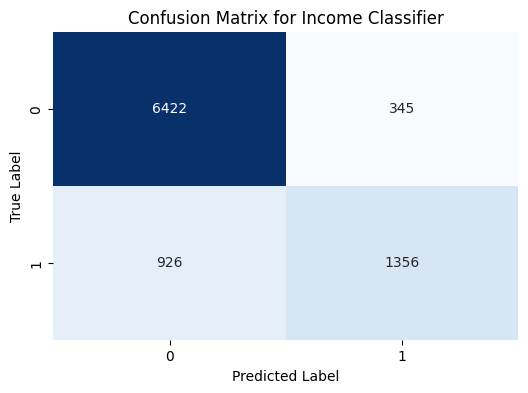

In [72]:
# Confusion matrix

y_pred = best_gradient_boosting.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Income Classifier")
plt.show()

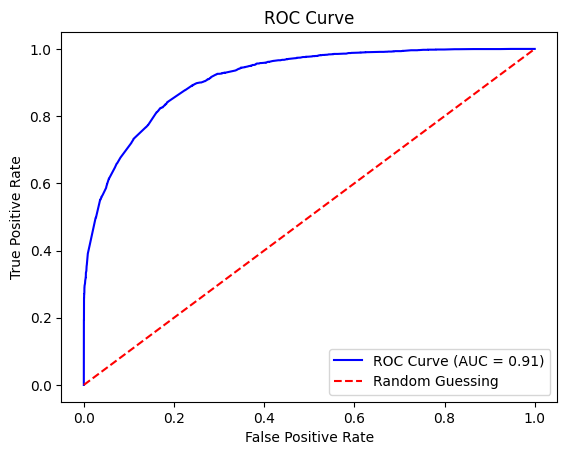

In [71]:
# ROC curve
y_pred_prob = best_gradient_boosting.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Fin!